# Process & Analyze

#### Guiding questions
1)What tools are you choosing and why?

A)The entries in the trips tables from the July 2021 to June 2022 are enormous. Since this is the case it is always easy and helpful to navigate through the data using either databases or Pyhton3 programming language. I will be using Python3 language to deal with the data in this case study.

2)Have you ensured your data’s integrity?

A)The qualities required to verify the data integrity are accuracy, completeness, consistency, and trustworthiness. The data is complete as it contains all the required components to measure the entity. The data is consistent across the years with every year having its CSV file which is organized in an equal number of columns and same data types. As the credibility was proven before, it is also trustworthy.

3) What steps have you taken to ensure that your data is clean?

A)a) I have merged all the CSV files of each year into a single data frame

b) Removed all the empty rows and columns from the concatenated data frame.

c) Checked the unique values in each variable using count() so that there is no misspelling anywhere.

d) Omitted N/A values from the entire data frame.

e) Removed duplicates

4)How can you verify that your data is clean and ready to analyze?

A)After performing all the cleaning tasks mentioned above, I ran the below functions to verify: a) Used filter() to check if there were any missing values b) Used count() to check the unique values of each variable c) Used duplicated() to check for any duplicates present.

5)Have you documented your cleaning and analyzing process so you can review and share those results?

A)Yes, please find the below comments and snippets for the documentation.

# Process part

### Firstly, let's import all the required libraries using import function

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

## Now let's load the csv data that we have imported after semi processed and merged all the 12 csv datas into one after filtering out the null values in MySQL using BigQuery

In [2]:
df = pd.read_csv('processed_data_sql.csv')

## Now preview & check the structure of the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5900385 entries, 0 to 5900384
Data columns (total 14 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   ride_id             object 
 2   rideable_type       object 
 3   started_at          object 
 4   ended_at            object 
 5   start_station_name  object 
 6   start_station_id    object 
 7   end_station_name    object 
 8   end_station_id      object 
 9   start_lat           float64
 10  start_lng           float64
 11  end_lat             float64
 12  end_lng             float64
 13  member_casual       object 
dtypes: float64(4), int64(1), object(9)
memory usage: 630.2+ MB


## getting a glimpse of data

In [4]:
df.head()

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,0,0A1B623926EF4E16,docked_bike,2021-07-02 14:44:36,2021-07-02 15:19:58,Michigan Ave & Washington St,13001,Halsted St & North Branch St,KA1504000117,41.883984,-87.624684,41.899368,-87.648480,casual
1,1,B2D5583A5A5E76EE,classic_bike,2021-07-07 16:57:42,2021-07-07 17:16:09,California Ave & Cortez St,17660,Wood St & Hubbard St,13432,41.900363,-87.696704,41.889899,-87.671473,casual
2,2,6F264597DDBF427A,classic_bike,2021-07-25 11:30:55,2021-07-25 11:48:45,Wabash Ave & 16th St,SL-012,Rush St & Hubbard St,KA1503000044,41.860384,-87.625813,41.890173,-87.626185,member
3,3,379B58EAB20E8AA5,classic_bike,2021-07-08 22:08:30,2021-07-08 22:23:32,California Ave & Cortez St,17660,Carpenter St & Huron St,13196,41.900363,-87.696704,41.894556,-87.653449,member
4,4,6615C1E4EB08E8FB,electric_bike,2021-07-28 16:08:06,2021-07-28 16:27:09,California Ave & Cortez St,17660,Elizabeth (May) St & Fulton St,13197,41.900350,-87.696682,41.886593,-87.658387,casual


## Now remove rows that contain station id which are not right i.e, which are not numeric

In [5]:
df = df[df['start_station_id'].apply(lambda x: str(x).isdigit())]
df = df[df['end_station_id'].apply(lambda x: str(x).isdigit())]

## convert sation id into int type

In [6]:
df = df.astype({'start_station_id':'int64'})
df = df.astype({'end_station_id':'int64'})

## convert started_at and ended_at columns into datetime

In [7]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

## add seperate columns for day, month, year, hour of the day, day of the week and duration of each ride by extracting the data from started_at and ended_at columns

In [8]:
df['day'] = df['started_at'].dt.day_name()
df['month'] = pd.DatetimeIndex(df['started_at']).month
df['year'] = pd.DatetimeIndex(df['started_at']).year
df['hour of the day'] = df['started_at'].dt.hour
df['day of week'] = df['started_at'].dt.dayofweek
df['duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

## filtering out data that has rows which have duartion greater than 1 min as below 1 min rides are irrelevant

In [9]:
df = df[df.duration > 1]

## removing rows with any null values in any entries

In [10]:
df.dropna(inplace = True)

## checking for unique values so that we dont incur any spelling mistakes in the data

In [11]:
df.rideable_type.unique()

array(['classic_bike', 'electric_bike', 'docked_bike'], dtype=object)

In [12]:
df.member_casual.unique()

array(['casual', 'member'], dtype=object)

## we can see that there is no spelling mistakes here

## now we have to drop duplocate entries with same ride_id as ride_id is unique for each ride

In [13]:
df.drop_duplicates(subset=['ride_id'])

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day,month,year,hour of the day,day of week,duration
1,1,B2D5583A5A5E76EE,classic_bike,2021-07-07 16:57:42,2021-07-07 17:16:09,California Ave & Cortez St,17660,Wood St & Hubbard St,13432,41.900363,-87.696704,41.889899,-87.671473,casual,Wednesday,7,2021,16,2,18.450000
3,3,379B58EAB20E8AA5,classic_bike,2021-07-08 22:08:30,2021-07-08 22:23:32,California Ave & Cortez St,17660,Carpenter St & Huron St,13196,41.900363,-87.696704,41.894556,-87.653449,member,Thursday,7,2021,22,3,15.033333
4,4,6615C1E4EB08E8FB,electric_bike,2021-07-28 16:08:06,2021-07-28 16:27:09,California Ave & Cortez St,17660,Elizabeth (May) St & Fulton St,13197,41.900350,-87.696682,41.886593,-87.658387,casual,Wednesday,7,2021,16,2,19.050000
5,5,62DC2B32872F9BA8,electric_bike,2021-07-29 17:09:08,2021-07-29 17:15:00,California Ave & Cortez St,17660,Albany Ave & Bloomingdale Ave,15655,41.900328,-87.696735,41.913887,-87.705128,casual,Thursday,7,2021,17,3,5.866667
6,6,4BBB6E80E6A2A16D,classic_bike,2021-07-28 16:51:47,2021-07-28 17:03:45,California Ave & Cortez St,17660,Albany Ave & Bloomingdale Ave,15655,41.900363,-87.696704,41.914027,-87.705126,casual,Wednesday,7,2021,16,2,11.966667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5900377,769196,BC12300141A81206,classic_bike,2022-06-19 11:53:33,2022-06-19 12:22:46,Blue Island Ave & 18th St,13135,Michigan Ave & Oak St,13042,41.857556,-87.661535,41.900960,-87.623777,member,Sunday,6,2022,11,6,29.216667
5900379,769198,F1C4F671FE0FDDD1,electric_bike,2022-06-26 19:50:04,2022-06-26 19:55:23,Clarendon Ave & Junior Ter,13389,Clarendon Ave & Junior Ter,13389,41.960997,-87.649456,41.961004,-87.649603,member,Sunday,6,2022,19,6,5.316667
5900380,769199,7B3B2890CA85E05D,classic_bike,2022-06-25 00:56:48,2022-06-25 01:01:39,Sheffield Ave & Kingsbury St,13154,Sheffield Ave & Kingsbury St,13154,41.910522,-87.653106,41.910522,-87.653106,member,Saturday,6,2022,0,5,4.850000
5900381,769200,1E993989CC66BCBC,classic_bike,2022-06-25 00:56:25,2022-06-25 01:00:26,Sheffield Ave & Kingsbury St,13154,Sheffield Ave & Kingsbury St,13154,41.910522,-87.653106,41.910522,-87.653106,member,Saturday,6,2022,0,5,4.016667


## Now check the data after cleaning i.e, processing

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1026616 entries, 1 to 5900384
Data columns (total 20 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   Unnamed: 0          1026616 non-null  int64         
 1   ride_id             1026616 non-null  object        
 2   rideable_type       1026616 non-null  object        
 3   started_at          1026616 non-null  datetime64[ns]
 4   ended_at            1026616 non-null  datetime64[ns]
 5   start_station_name  1026616 non-null  object        
 6   start_station_id    1026616 non-null  int64         
 7   end_station_name    1026616 non-null  object        
 8   end_station_id      1026616 non-null  int64         
 9   start_lat           1026616 non-null  float64       
 10  start_lng           1026616 non-null  float64       
 11  end_lat             1026616 non-null  float64       
 12  end_lng             1026616 non-null  float64       
 13  member_casua

In [15]:
df.head()

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day,month,year,hour of the day,day of week,duration
1,1,B2D5583A5A5E76EE,classic_bike,2021-07-07 16:57:42,2021-07-07 17:16:09,California Ave & Cortez St,17660,Wood St & Hubbard St,13432,41.900363,-87.696704,41.889899,-87.671473,casual,Wednesday,7,2021,16,2,18.450000
3,3,379B58EAB20E8AA5,classic_bike,2021-07-08 22:08:30,2021-07-08 22:23:32,California Ave & Cortez St,17660,Carpenter St & Huron St,13196,41.900363,-87.696704,41.894556,-87.653449,member,Thursday,7,2021,22,3,15.033333
4,4,6615C1E4EB08E8FB,electric_bike,2021-07-28 16:08:06,2021-07-28 16:27:09,California Ave & Cortez St,17660,Elizabeth (May) St & Fulton St,13197,41.900350,-87.696682,41.886593,-87.658387,casual,Wednesday,7,2021,16,2,19.050000
5,5,62DC2B32872F9BA8,electric_bike,2021-07-29 17:09:08,2021-07-29 17:15:00,California Ave & Cortez St,17660,Albany Ave & Bloomingdale Ave,15655,41.900328,-87.696735,41.913887,-87.705128,casual,Thursday,7,2021,17,3,5.866667
6,6,4BBB6E80E6A2A16D,classic_bike,2021-07-28 16:51:47,2021-07-28 17:03:45,California Ave & Cortez St,17660,Albany Ave & Bloomingdale Ave,15655,41.900363,-87.696704,41.914027,-87.705126,casual,Wednesday,7,2021,16,2,11.966667


## Now create an another data frame from existing data frame where we will store only station names

In [16]:
all_stations = df[['ride_id', 'start_station_name', 'end_station_name', 'member_casual']].copy()

In [17]:
all_stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1026616 entries, 1 to 5900384
Data columns (total 4 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   ride_id             1026616 non-null  object
 1   start_station_name  1026616 non-null  object
 2   end_station_name    1026616 non-null  object
 3   member_casual       1026616 non-null  object
dtypes: object(4)
memory usage: 39.2+ MB


In [18]:
all_stations.head()

,ride_id,start_station_name,end_station_name,member_casual
1,B2D5583A5A5E76EE,California Ave & Cortez St,Wood St & Hubbard St,casual
3,379B58EAB20E8AA5,California Ave & Cortez St,Carpenter St & Huron St,member
4,6615C1E4EB08E8FB,California Ave & Cortez St,Elizabeth (May) St & Fulton St,casual
5,62DC2B32872F9BA8,California Ave & Cortez St,Albany Ave & Bloomingdale Ave,casual
6,4BBB6E80E6A2A16D,California Ave & Cortez St,Albany Ave & Bloomingdale Ave,casual


## creating seperate dataframes for both casual and member riders for the station names

In [19]:
all_stations_casual = all_stations[all_stations["member_casual"].str.contains("casual")]
all_stations_casual

,ride_id,start_station_name,end_station_name,member_casual
1,B2D5583A5A5E76EE,California Ave & Cortez St,Wood St & Hubbard St,casual
4,6615C1E4EB08E8FB,California Ave & Cortez St,Elizabeth (May) St & Fulton St,casual
5,62DC2B32872F9BA8,California Ave & Cortez St,Albany Ave & Bloomingdale Ave,casual
6,4BBB6E80E6A2A16D,California Ave & Cortez St,Albany Ave & Bloomingdale Ave,casual
7,22CA03D32C6BB094,Clark St & North Ave,Clark St & Chicago Ave,casual
...,...,...,...,...
5900361,E8D5C4A73DC71393,Aberdeen St & Randolph St,May St & Taylor St,casual
5900367,BBEDFFC5151A999F,Aberdeen St & Monroe St,May St & Taylor St,casual
5900371,044C69AD133CA722,Streeter Dr & Grand Ave,Lincoln Ave & Waveland Ave,casual
5900372,0F124A0CC380A05F,Streeter Dr & Grand Ave,Clarendon Ave & Junior Ter,casual


In [20]:
all_stations_member = all_stations[all_stations["member_casual"].str.contains("member")]
all_stations_member

,ride_id,start_station_name,end_station_name,member_casual
3,379B58EAB20E8AA5,California Ave & Cortez St,Carpenter St & Huron St,member
11,3BB45ACFD928900D,Clark St & North Ave,Stockton Dr & Wrightwood Ave,member
33,799BAE461A39D578,Artesian Ave & Hubbard St,Wood St & Hubbard St,member
34,AB9681EF66F00872,Artesian Ave & Hubbard St,Wood St & Hubbard St,member
35,E0D1EF2E63AA5C5F,Artesian Ave & Hubbard St,Wood St & Hubbard St,member
...,...,...,...,...
5900376,124B0EDFDFC24764,Blue Island Ave & 18th St,Racine Ave & 18th St,member
5900377,BC12300141A81206,Blue Island Ave & 18th St,Michigan Ave & Oak St,member
5900379,F1C4F671FE0FDDD1,Clarendon Ave & Junior Ter,Clarendon Ave & Junior Ter,member
5900380,7B3B2890CA85E05D,Sheffield Ave & Kingsbury St,Sheffield Ave & Kingsbury St,member


### **The processing part is done!**

# Analyzing data

### Find the overall summary of all rides by rider type

In [21]:
df[["member_casual", "duration"]].groupby("member_casual").describe()

duration                                                    \
                  count       mean         std  min        25%        50%   
member_casual                                                               
casual         506005.0  32.090065  176.658973  1.0  10.183333  18.433333   
member         520611.0  13.711399   18.741152  1.0   5.750000  10.116667   

                                        
                     75%           max  
member_casual                           
casual         33.783333  41645.516667  
member         17.216667   1486.383333

### We can clearly note that the avg ride time of a casual rider is 32.09 min which is way more than that of member rider with 13.71 min

### we only need count of rides

In [22]:
df[["member_casual", ("ride_id")]].groupby("member_casual").count()

,ride_id
member_casual,
casual,506005
member,520611


## pie chart showing variation of no of rides by type of rider

<AxesSubplot:title={'center':'percentage ditribution of members and casual riders'}, ylabel='duration'>

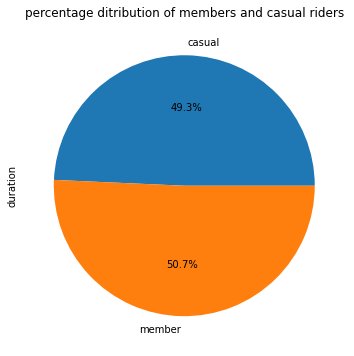

In [23]:
df_group = df.groupby(['member_casual'])['duration'].count()

#create pie chart with custom aesthetics
df_group.plot(kind='pie', title='percentage ditribution of members and casual riders',
               autopct='%1.1f%%', figsize=(10, 6))

### bar graph showing distribution of no of rides by rider type

<AxesSubplot:title={'center':'members vs casuals'}, xlabel='member/casual', ylabel='no of rides'>

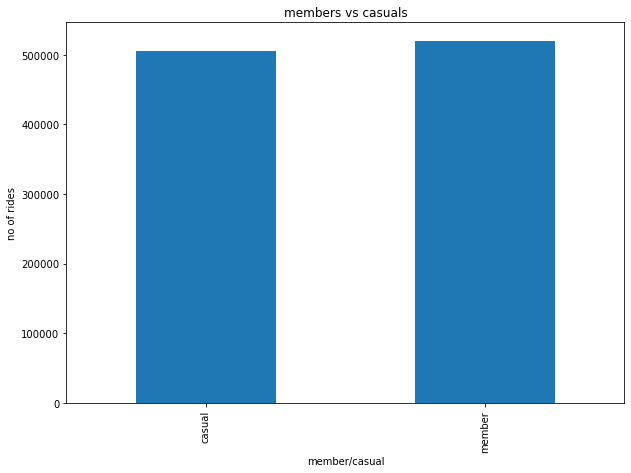

In [24]:
df_group = df.groupby(['member_casual'])['duration'].count()

#create bar plot with custom aesthetics
df_group.plot(kind='bar', title='members vs casuals',
               ylabel='no of rides', xlabel='member/casual', figsize=(10, 7))

### from the above bar chart we can say that no. of rides casual riders took is 506005 and that of member riders is 520611
### it is known from pie chart that 50.7% of the total riders in the last 12 months were annual members. The remaining(49.3%) are casual riders.
### this is kind of good as the member riders are more than that of casual riders

### lets see how casual and member riders use bikes with each hour of the day

In [25]:
grouped_multiple = df.groupby(['member_casual', 'hour of the day']).agg({'duration': ['count', 'mean']})
grouped_multiple.columns = ['no of rides','avg ride duration']
grouped_multiple

no of rides  avg ride duration
member_casual hour of the day                                
casual        0                       8972          33.930510
              1                       6005          28.485137
              2                       4029          34.089935
              3                       2294          38.124375
              4                       1440          66.911979
              5                       2216          23.367381
              6                       4334          28.610014
              7                       8053          23.761366
              8                      12095          28.341327
              9                      15495          32.485706
              10                     22617          35.837399
              11                     29785          36.176495
              12                     35334          35.613480
              13                     38234          35.562082
              14                     39742          35.942824
              15                     40600          34.008222
              16                     42017          31.445269
              17                     46406          29.136833
              18                     41978          29.428911
              19                     32002          29.972858
              20                     22621          28.987770
              21                     19225          28.276998
              22                     17409          27.243904
              23                     13102          28.314537
member        0                       4875          13.097173
              1                       3116          15.397267
              2                       1809          13.571494
              3                       1051          13.958278
              4                       1487          11.941594
              5                       5792          11.576088
              6                      13943          12.535668
              7                      26168          12.331685
              8                      31895          11.986836
              9                      22284          12.763310
              10                     21333          13.807555
              11                     26148          14.407683
              12                     30202          13.750577
              13                     29101          13.675606
              14                     28593          14.252117
              15                     33328          14.363673
              16                     43965          14.184314
              17                     56176          14.343409
              18                     46787          14.280070
              19                     32515          14.032121
              20                     22353          13.683216
              21                     16810          13.505168
              22                     12521          13.423884
              23                      8359          13.487831

### adding above results into a new dataframe

In [26]:
data={'member_casual':['casual','casual','casual','casual','casual','casual','casual','casual','casual','casual','casual','casual','casual','casual','casual','casual','casual','casual','casual','casual','casual','casual','casual','casual','member','member','member','member','member','member','member','member','member','member','member','member','member','member','member','member','member','member','member','member','member','member','member','member'],'hour of the day':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,],'no of rides' : [8972,6005,4029,2294,1440,2216,4334,8053,12095,15495,22617,29785,35334,38234,39742,40600,42017,46406,41978,32002,22621,19225,17409,13102,4875,3116,1809,1051,1487,5792,13943,26168,31895,22284,21333,26148,30202,29101,28593,33328,43965,56176,46787,32515,22353,16810,12521,8359]}
m1=pd.DataFrame(data)
m1

,member_casual,hour of the day,no of rides
0,casual,1,8972
1,casual,2,6005
2,casual,3,4029
3,casual,4,2294
4,casual,5,1440
5,casual,6,2216
6,casual,7,4334
7,casual,8,8053
8,casual,9,12095
9,casual,10,15495


### Plotting hourly dist graph of riders

[Text(0.5, 1.0, 'membership wise hourly distribution of no of rides')]

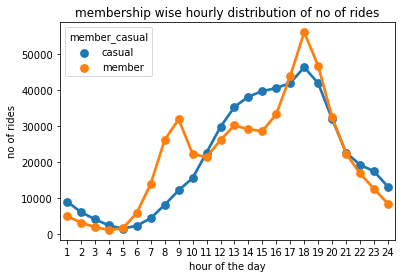

In [27]:
import seaborn as sns

fig,ax = plt.subplots()
sns.pointplot(data=m1[['hour of the day',
                           'no of rides',
                           'member_casual']],
              x='hour of the day',
              y='no of rides',
              hue='member_casual',
              ax=ax)
ax.set(title="membership wise hourly distribution of no of rides")

### from the above distribution we can say that there is a sudden peak in value of no of both causal and member riders of in evening time i.e, at 6 pm to be precise
### and also peak in no of member riders in morning 9 am

### now lets check summary of riders by day of the week

In [28]:
grouped_multiple = df.groupby(['member_casual', 'day of week']).agg({'duration': ['count', 'mean']})
grouped_multiple.columns = ['no of rides','avg ride duration']
grouped_multiple

no of rides  avg ride duration
member_casual day of week                                
casual        0                  61055          34.208277
              1                  50892          29.296061
              2                  52403          27.982025
              3                  58795          28.453529
              4                  69933          31.088526
              5                 114162          34.080276
              6                  98765          34.973505
member        0                  73049          13.293826
              1                  79368          12.671277
              2                  80195          12.950158
              3                  80544          13.057820
              4                  71942          13.298599
              5                  71836          15.406250
              6                  63677          15.826628

### Plotting bar graph showing how no of rides taken by member and casual riders differ with respect to each day of the week

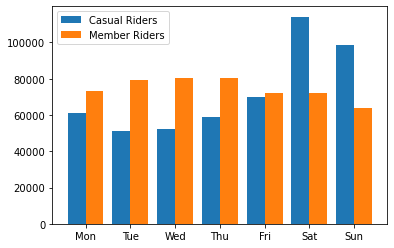

In [29]:
casual = [61055,50892,52403,58795,69933,114162,98765]
member = [73049,79368,80195,80544,71942,71836,63677]
week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
x_axis = np.arange(len(week))

# Multi bar Chart


plt.bar(x_axis -0.2, casual, width=0.4, label = 'Casual Riders')
plt.bar(x_axis +0.2, member, width=0.4, label = 'Member Riders')

# Xticks


plt.xticks(x_axis, week)

# Add legend

plt.legend()
# Display

plt.show()

### plotiing bar graphs seperately to see the trend

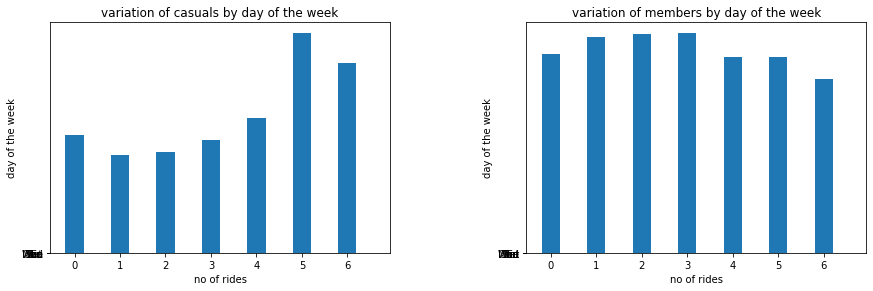

In [30]:
# Draw first subplot
width = 0.4
plt.subplot(1, 2, 1)
plt.bar(x_axis, casual, width=width)
plt.bar(x_axis + width, week, width=width)

#addlabels(member, week)
      
# giving title to the plot
plt.title("variation of casuals by day of the week")
      
# giving X and Y labels
plt.xlabel("no of rides")
plt.ylabel("day of the week")

# Draw second subplot

plt.subplot(1, 2, 2)
plt.bar(x_axis, member, width=width)
plt.bar(x_axis + width, week, width=width)

# calling the function to add value labels
#addlabels(casual, week)
      
# giving title to the plot
plt.title("variation of members by day of the week")
      
# giving X and Y labels
plt.xlabel("no of rides")
plt.ylabel("day of the week")
# Display

plt.subplots_adjust(left=0.01,
                    bottom=0.1, 
                    right=1.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.1)
plt.show()

### now lets check summary of riders by each month

In [31]:
grouped_multiple = df.groupby(['member_casual', 'month']).agg({'duration': ['count', 'count']})
grouped_multiple.columns = ['no of rides','no of rides']
grouped_multiple

no of rides  no of rides
member_casual month                          
casual        1             2901         2901
              2             3605         3605
              3            18421        18421
              4            24988        24988
              5            57581        57581
              6            73682        73682
              7            93185        93185
              8            84172        84172
              9            72761        72761
              10           45687        45687
              11           17212        17212
              12           11810        11810
member        1            12932        12932
              2            13823        13823
              3            28719        28719
              4            34511        34511
              5            55906        55906
              6            66332        66332
              7            63750        63750
              8            65565        65565
              9            64490        64490
              10           54094        54094
              11           34709        34709
              12           25780        25780

### Plotting bar graph showing how no of rides taken by member and casual riders differ with respect to each month

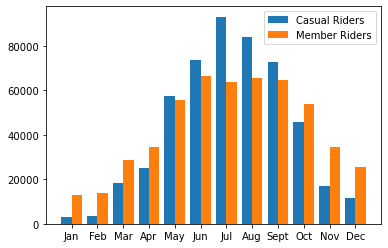

In [32]:
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
casual = [2901,3605,18421,24988,57581,73682,93185,84172,72761,45687,17212,11810]
member = [12932,13823,28719,34511,55906,66332,63750,65565,64490,54094,34709,25780]

x_axis = np.arange(len(month))

# Multi bar Chart

plt.bar(x_axis -0.2, casual, width=0.4, label = 'Casual Riders')
plt.bar(x_axis +0.2, member, width=0.4, label = 'Member Riders')

# Xticks

plt.xticks(x_axis, month)

# Add legend

plt.legend()

# Display

plt.show()

### From the above distribution we can say that no of rides taken by both casual and member riders is increasing till july and decreasing there after sort of creating a bell curve

### lets check the sumary of riders by type of bikes they ride

In [33]:
grouped_multiple = df.groupby(['member_casual', 'rideable_type']).agg({'duration': ['count', 'mean']})
grouped_multiple.columns = ['no of rides','avg ride duration']
grouped_multiple

no of rides  avg ride duration
member_casual rideable_type                                
casual        classic_bike        290247          28.586055
              docked_bike          82371          62.278873
              electric_bike       133387          21.072095
member        classic_bike        375906          14.245336
              electric_bike       144705          12.324368

### Plotting bar graph showing how no of rides taken by member and casual riders differ with respect to the bike they ride

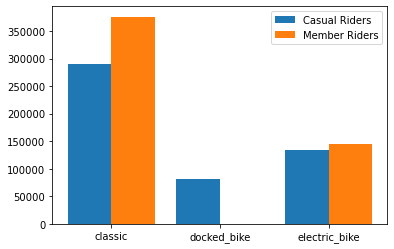

In [34]:
casual = [290247,82371,133387]
member = [375906,0,144705]
bike_type = ['classic', 'docked_bike', 'electric_bike']
x_axis = np.arange(len(bike_type))

# Multi bar Chart


plt.bar(x_axis -0.2, casual, width=0.4, label = 'Casual Riders')
plt.bar(x_axis +0.2, member, width=0.4, label = 'Member Riders')

# Xticks


plt.xticks(x_axis, bike_type)

# Add legend

plt.legend()
# Display

plt.show()

### From the above plot we can say that both the riders are using classic bikes more than other types

### now lets check summary of casual riders with respect to top 10 stations used

In [35]:
top_ten_casual = all_stations_casual[["start_station_name", ("ride_id")]].groupby("start_station_name").count().nlargest(10, 'ride_id')
top_ten_casual

,ride_id
start_station_name,
Streeter Dr & Grand Ave,36769
DuSable Lake Shore Dr & Monroe St,19010
Millennium Park,18019
Michigan Ave & Oak St,15032
Shedd Aquarium,13596
Michigan Ave & 8th St,6966
Michigan Ave & Washington St,6779
Adler Planetarium,6540
Clark St & Armitage Ave,6487


### Plotting bar graph showing no of rides taken by casual riders of top 10 used stations

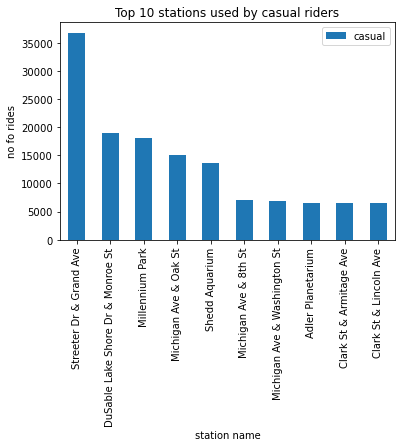

In [36]:
start_station_name = ['Streeter Dr & Grand Ave', 'DuSable Lake Shore Dr & Monroe St', 'Millennium Park', 'Michigan Ave & Oak St', 'Shedd Aquarium', 'Michigan Ave & 8th St', 'Michigan Ave & Washington St', 'Adler Planetarium', 'Clark St & Armitage Ave', 'Clark St & Lincoln Ave']
casual = [36769,19010,18019,15032,13596,6966,6779,6540,6487,6458]
cas = pd.DataFrame({'start_station_name' : start_station_name, 'casual' : casual})
cas.plot.bar(x="start_station_name", y="casual", rot = 90)
plt.title("Top 10 stations used by casual riders")
plt.xlabel("station name")
plt.ylabel("no fo rides")
plt.show()

### now lets check summary of member riders with respect to top 10 stations used

In [37]:
top_ten_member = all_stations_member[["start_station_name", ("ride_id")]].groupby("start_station_name").count().nlargest(10, 'ride_id')
top_ten_member

,ride_id
start_station_name,
Ashland Ave & Division St,7732
Streeter Dr & Grand Ave,7263
St. Clair St & Erie St,7257
Broadway & Barry Ave,6401
Dearborn St & Erie St,6379
Loomis St & Lexington St,6345
Canal St & Adams St,6137
Clark St & Armitage Ave,5983
Broadway & Waveland Ave,5896


### Plotting bar graph showing no of rides taken by member riders of top 10 used stations

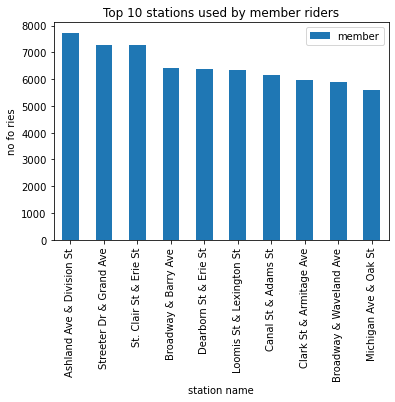

In [38]:
start_station_name = ['Ashland Ave & Division St', 'Streeter Dr & Grand Ave', 'St. Clair St & Erie St', 'Broadway & Barry Ave', 'Dearborn St & Erie St', 'Loomis St & Lexington St', 'Canal St & Adams St', 'Clark St & Armitage Ave', 'Broadway & Waveland Ave', 'Michigan Ave & Oak St']
member = [7732,7263,7257,6401,6379,6345,6137,5983,5896,5587]
mem = pd.DataFrame({'start_station_name' : start_station_name, 'member' : member})
mem.plot.bar(x="start_station_name", y="member", rot = 90)
plt.title("Top 10 stations used by member riders")
plt.xlabel("station name")
plt.ylabel("no fo ries")
plt.show()

### Finally let's check how each of the attributes are correlated to each other by plotting a heat map

<AxesSubplot:>

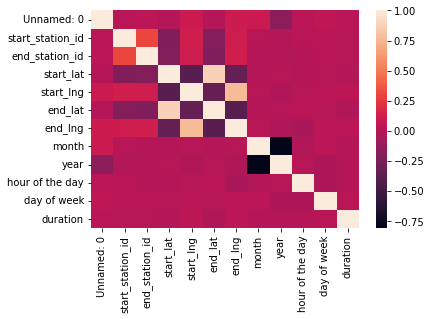

In [39]:
corr = df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)